### implementing Multiple Regression models 
***

##### The matrix bellow gives you an insight on how to select you model based your dataset size and number of features 
![](reg.PNG)
***
###### in case of a large dataset and with many features then most probably the best estimator to use is an SGD (stochastic Gradient Descent) 

###### data source: //www.kaggle.com/uciml/autompg-dataset

## Loading and preparing the Data 

In [1]:
# importing needed libraries

import sklearn
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import datetime

In [2]:
# displaying the data

automobile_data = pd.read_csv('auto-mpg.csv')
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
326,43.4,4,90.0,48,2335,23.7,80,2,vw dasher (diesel)
88,14.0,8,302.0,137,4042,14.5,73,1,ford gran torino
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
373,24.0,4,140.0,92,2865,16.4,82,1,ford fairmont futura
132,25.0,4,140.0,75,2542,17.0,74,1,chevrolet vega


In [3]:
automobile_data.shape

(398, 9)

In [4]:
# replace '?' present in the data with Nan 
automobile_data = automobile_data.replace('?', np.nan)
# drop all nan values present in the data
automobile_data.dropna(inplace = True)

In [5]:
automobile_data.shape

(392, 9)

In [6]:
automobile_data.drop(['origin','car name'], axis = 1, inplace = True)

In [7]:
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
338,27.2,4,135.0,84,2490,15.7,81
371,29.0,4,135.0,84,2525,16.0,82
191,22.0,6,225.0,100,3233,15.4,76
31,25.0,4,113.0,95,2228,14.0,71
380,36.0,4,120.0,88,2160,14.5,82


In [8]:
# convert model year to the age of the car 
# the cars from the 90s ==>'19'+ model year to have year of the model in from '19XX' 
automobile_data['model year'] = '19' + automobile_data['model year'].astype(str)  


In [9]:
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
379,36.0,4,98.0,70,2125,17.3,1982
391,36.0,4,135.0,84,2370,13.0,1982
395,32.0,4,135.0,84,2295,11.6,1982
320,37.0,4,119.0,92,2434,15.0,1980
265,17.5,8,318.0,140,4080,13.7,1978


In [10]:
# calculate the age of the car by substruction current year - model year 
#put result in a column 'age'
# drop column 'model year '
automobile_data['age'] = datetime.datetime.now().year-pd.to_numeric(automobile_data['model year'])
automobile_data.drop(['model year'], axis = 1, inplace = True)
automobile_data.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
153,18.0,6,250.0,105,3459,16.0,45
329,44.6,4,91.0,67,1850,13.8,40
37,18.0,6,232.0,100,3288,15.5,49
74,13.0,8,302.0,140,4294,16.0,48
235,26.0,4,97.0,75,2265,18.2,43


In [11]:
# check types of our data 
automobile_data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [12]:
# convert column 'horsepower' into numeric 
automobile_data['horsepower'] = pd.to_numeric(automobile_data['horsepower'], errors = 'coerce' )
automobile_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [13]:
#shuffeling the data 
automobile_data = automobile_data.sample(frac = 1).reset_index(drop = True)
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,29.8,4,134.0,90,2711,15.5,40
1,25.4,6,168.0,116,2900,12.6,39
2,16.0,6,250.0,100,3278,18.0,47
3,17.0,8,305.0,130,3840,15.4,41
4,16.5,8,350.0,180,4380,12.1,44


# models bulding

In [14]:
# import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 

#not recomended to disable warnings 
import warnings 
warnings.filterwarnings("ignore")


In [16]:
# intantiate a dictionary that holds the training and test scores 
result_dict = {}

In [17]:
# function to build and train diffrent models  
# regression_fn : intantiate a particular regression model  
#name_of_y_col : specifies the column name for the target values we use in training  
#names_ofx_cols: list of feature columns 
#datasets: original dataframe that contain features and target values 
#test_frac= 0.2: fraction of that data that will be used as test data 20%
#preprocess_fn = None: preprocess function that standardize or scale our data 
#show_plot_Y = False : set to True to display acrual versus predicted values
#show_plot_scater = False: set to true to see how regression line fits in our training data

def build_model(regression_fn,
               name_of_y_col,
               names_of_x_cols,
               datasets,
               test_frac= 0.2,
               preprocess_fn = None,
               show_plot_Y = False,
               show_plot_scatter = False):
    
    X = datasets[names_of_x_cols]
    Y = datasets[name_of_y_col]
    
# apply preprocssor funtion to x values if trigred 
    if preprocess_fn is not None : 
        X = preprocess_fn(X)
# split data set to train and test sets 
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = test_frac)
    
# passing training data to regression function 
    model = regression_fn(x_train,y_train) 
    y_pred = model.predict(x_test)
    
# print r-square values     
    print("training_score : ", model.score(x_train, y_train))
    print("test_score : ", r2_score(y_test,y_pred))
    
#plotting actual values vs predicted values if called = True 
    if show_plot_Y == True:
        fig,ax = plt.subplots(figsize =(12,8))
        
        plt.plot(y_pred, label = 'Predicted')
        plt.plot(y_test.values, label = 'Actual')
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()

# display scatter with original x and y values of test data and the predicted line
# works only if you use a single feature for training 

    if show_plot_scatter == True:
        fig,ax = plt.subplots(figsize =(12,8))
        
        plt.scatter(x_test, y_test )
        plt.plot(x_test, y_pred , 'r' )
        
        plt.legend(['predicted line','observed data'])
        plt.show()
        
# return training score and test r score 
        
    return {
        'training_score' : model.score(x_train, y_train ),
        'test_score' :r2_score(y_test,y_pred)
        
           }
        

In [18]:
def compare_results():
    for key in result_dict:
        print('Regression:', key)
        print('training_score', result_dict[key]['training_score'])
        print('test score ', result_dict[key]['test_score'])
        print()

### bulding a support vector regressor 
###### training with all features 'kitchen_sink'

In [19]:

def svr_reg(x_train, y_train, kernel = 'linear',epsilon = 0.05, C =0.3):
    model = SVR(kernel = kernel, epsilon = epsilon, C =C)
    model.fit(x_train,y_train)
    
    return model 
# LinearSVR == SVR(kernel = 'linear')
# SVR tries to fit as many points as possible into a margin surrounding the best fit line
# epsilon : margin or epsilon tube = 2e
# C : Penalty to apply to pints which lie outside the epsilon tube while calculating errors 


training_score :  0.7134507335724412
test_score :  0.6267061642139327


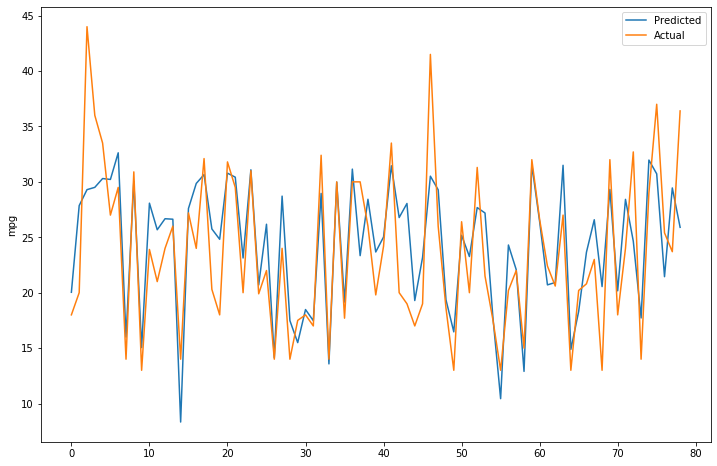

In [20]:
result_dict['mpg-kitchen_sink_SVR'] = build_model(svr_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_data,
                                                    show_plot_Y = True)

 ### bulding a KNN regressor 
###### training with all features 'kitchen_sink'

In [22]:

def KNN_reg(x_train, y_train,n_neighbors = 10):
    model = KNeighborsRegressor(n_neighbors= n_neighbors)
    model.fit(x_train,y_train)
    return model 
# for a test instance the KNN regressor finds the K nearest neighbors and combiens their values to make a prediction
# n_neighbors : number of neighbors  
    

training_score :  0.7756592575678584
test_score :  0.6419541132787603


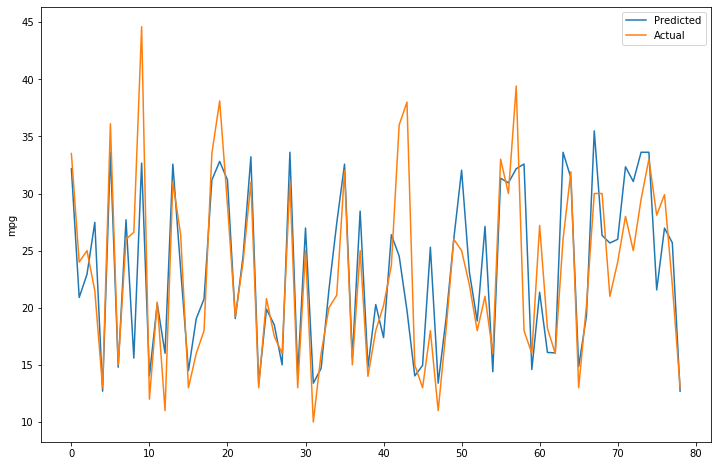

In [23]:
result_dict['mpg-kitchen_sink_KNN'] = build_model(KNN_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_data,
                                                    show_plot_Y = True)

 ### bulding an SGD regressor (stochastic Gradient Descent)
###### training with all features 'kitchen_sink'

In [27]:
# standardize dataset to have mean = 0 and variance = 1
def apply_standard_scaler(x):
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)

In [28]:
# SGD iteratively converges to the best model performs well on large datasets 

def sgd_reg(x_train, y_train,max_iter = 10000, tol = 1e-3):
    model = SGDRegressor(max_iter= max_iter, tol =tol)
    model.fit(x_train,y_train)
    return model 
#SGD performs numerical optimization -
# - one training instance at a time - to find best model parameters

training_score :  0.6990227648882271
test_score :  0.7306651076608008


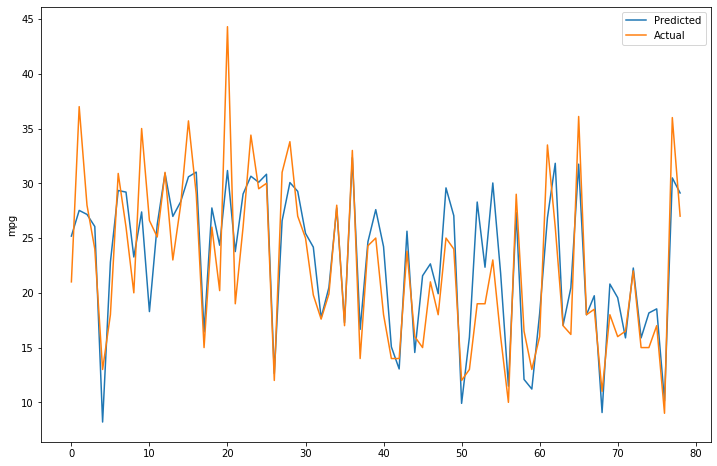

In [29]:
result_dict['mpg-kitchen_sink_SGD'] = build_model(sgd_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_data,
                                                    show_plot_Y = True,
                                                    preprocess_fn = apply_standard_scaler)

 ### bulding a Decision Tree regressor
###### training with all features 'kitchen_sink'

In [30]:
def DT_reg(x_train, y_train,max_depth =2):
    model = DecisionTreeRegressor(max_depth= max_depth)
    model.fit(x_train,y_train)
    return model 

training_score :  0.7440675259008555
test_score :  0.6661856390194596


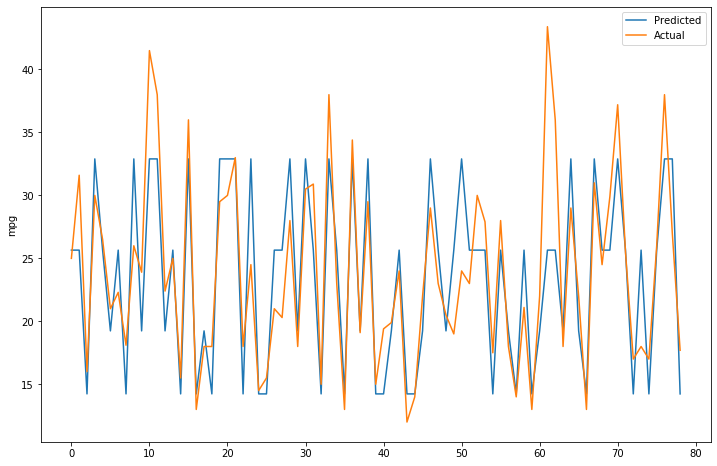

In [31]:
result_dict['mpg-kitchen_sink_DT'] = build_model(DT_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_data,
                                                    show_plot_Y = True)
                                        

 ### bulding a Least Angle regressoion model 'LARS'
###### training with all features 'kitchen_sink'
***
###### Least Angle Regression is a technique that works well 
###### when you have many more features than samples in your dataset 
###### relies on selecting x-variables that have high correlation with unexplaines y_variable

In [32]:
def lars_reg(x_train, y_train, n_nonzero_coefs = 4):
    model = Lars(n_nonzero_coefs= n_nonzero_coefs)
    model.fit(x_train,y_train)
    return model 
# works well for high_dimensionality data

training_score :  0.6868651196868227
test_score :  0.765936033071924


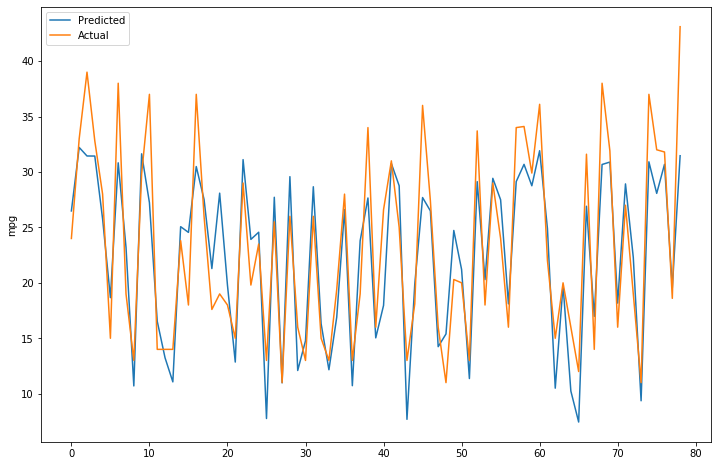

In [33]:
result_dict['mpg-kitchen_sink_lars'] = build_model(lars_reg,
                                                     'mpg',
                                                    ['cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'weight',
                                                    'acceleration'],
                                                    automobile_data,
                                                    show_plot_Y = True)

In [34]:
compare_results()

Regression: mpg-kitchen_sink_SVR
training_score 0.7134507335724412
test score  0.6267061642139327

Regression: mpg-kitchen_sink_KNN
training_score 0.7756592575678584
test score  0.6419541132787603

Regression: mpg-kitchen_sink_SGD
training_score 0.7440675259008555
test score  0.6661856390194596

Regression: mpg-kitchen_sink_lars
training_score 0.6868651196868227
test score  0.765936033071924

